# Make animation

In [1]:
%%capture 

# Important header information
amrwindfedir = '/projects/hfm/lcheung/amrwind-frontend/'
import sys, os
sys.path.insert(1, amrwindfedir)
sys.path.insert(1, '../utilities')

# Load the libraries
import matplotlib.pyplot as plt
import amrwind_frontend  as amrwind
import numpy             as np
from matplotlib import cm
import SOWFAdata as sowfa
import postproamrwindsample as ppsample

from matplotlib import animation
from IPython.display import HTML
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pickle

# Also ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Make all plots inline 
%matplotlib inline

In [2]:
plt.rcParams['animation.codec']  = 'wmv1' #'mpeg4'
plt.rcParams['animation.ffmpeg_path'] = '/nopt/nrel/apps/opencv/opt/spack/linux-centos7-skylake_avx512/gcc-6.4.0/ffmpeg-4.2.2-sezhmeit5o37aqf2scaz3ybi442gbeab/bin/ffmpeg'

In [3]:
moviename         = 'winterunstable.avi'
picklefile        = 'animate.pkl'
plottindex        = range(1080, 1110) #[1080, 1081, 1082] #[1080, 1440,  1800, 2160]
clevels           = np.linspace(6.6, 11, 81)

In [4]:
# Start the amrwind_frontend app 
tutorial2 = amrwind.MyApp.init_nogui()

In [5]:
tutorial2.Samplepostpro_loadnetcdffile('./post_processing/sampling00000.nc')

Loading ./post_processing/sampling00000.nc


In [6]:
sampletime        = ppsample.getVar(tutorial2.sample_ncdat, 'time')

for tindex in plottindex:
    print(sampletime[tindex])

21600.000000043518
21620.00000004359
21640.000000043663
21660.000000043736
21680.00000004381
21700.00000004388
21720.000000043954
21740.000000044027
21760.0000000441
21780.000000044172
21800.000000044245
21820.000000044318
21840.00000004439
21860.000000044463
21880.000000044536
21900.00000004461
21920.00000004468
21940.000000044754
21960.000000044827
21980.0000000449
22000.000000044973
22020.000000045045
22040.00000004512
22060.00000004519
22080.000000045264
22100.000000045336
22120.00000004541
22140.000000045482
22160.000000045555
22180.000000045628


In [7]:
# Load data
reloadpicklefile = True
if reloadpicklefile:
    with open( picklefile, "rb" ) as f:
        xU = pickle.load(f)
        yU = pickle.load(f)
        zU = pickle.load(f)
        Uhoriz = pickle.load(f)    
else:
    Uhoriz={}
    
for tindex in plottindex:
    print(sampletime[tindex])
    if tindex not in Uhoriz:
        xU,yU,zU, s1, s2, vx = ppsample.getPlaneSampleAtTime(tutorial2.sample_ncdat, 'p_hub', 'velocityx', tindex, 1)
        xU,yU,zU, s1, s2, vy = ppsample.getPlaneSampleAtTime(tutorial2.sample_ncdat, 'p_hub', 'velocityy', tindex, 1)
        Uhoriz[tindex] = np.sqrt(vx**2 + vy**2)

# Save data back as pickle
with open( picklefile, "wb" ) as f:
    pickle.dump(xU, f)
    pickle.dump(yU, f)
    pickle.dump(zU, f)
    pickle.dump(Uhoriz, f)

21600.000000043518
21620.00000004359
21640.000000043663
21660.000000043736
21680.00000004381
21700.00000004388
21720.000000043954
21740.000000044027
21760.0000000441
21780.000000044172
21800.000000044245
21820.000000044318
21840.00000004439
21860.000000044463
21880.000000044536
21900.00000004461
21920.00000004468
21940.000000044754
21960.000000044827
21980.0000000449
22000.000000044973
22020.000000045045
22040.00000004512
22060.00000004519
22080.000000045264
22100.000000045336
22120.00000004541
22140.000000045482
22160.000000045555
22180.000000045628


In [8]:
# animation function
def animate(i): 
    tindex = plottindex[i]
    print(sampletime[tindex])

    ax1.contourf(xU, yU, Uhoriz[tindex], clevels, cmap=cm.coolwarm)
    ax1.axis('equal')
    ax1.set_title('Uhoriz z=100m Time = %0.1f sec'%(sampletime[tindex]))
    
    return

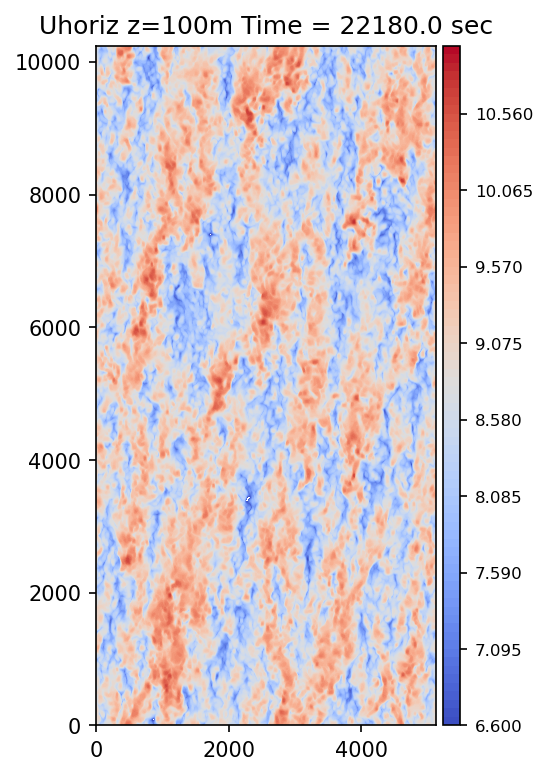

In [9]:
# Make the animation
fig, ax1 = plt.subplots(figsize=(4,6), facecolor='w', dpi=150)

im1=ax1.contourf(xU, yU, Uhoriz[plottindex[0]], clevels, cmap=cm.coolwarm)
ax1.axis('equal')
ax1.set_title('Uhoriz z=100m Time = %0.1f sec'%(sampletime[tindex]))

    
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar=fig.colorbar(im1, ax=ax1, cax=cax)
cbar.ax.tick_params(labelsize=8)

anim = animation.FuncAnimation(fig, animate, frames=len(plottindex))
#plt.show()

In [10]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=3, metadata=dict(artist='Me'), bitrate=1800)
anim.save(moviename, writer=writer)

21600.000000043518
21600.000000043518
21620.00000004359
21640.000000043663
21660.000000043736
21680.00000004381
21700.00000004388
21720.000000043954
21740.000000044027
21760.0000000441
21780.000000044172
21800.000000044245
21820.000000044318
21840.00000004439
21860.000000044463
21880.000000044536
21900.00000004461
21920.00000004468
21940.000000044754
21960.000000044827
21980.0000000449
22000.000000044973
22020.000000045045
22040.00000004512
22060.00000004519
22080.000000045264
22100.000000045336
22120.00000004541
22140.000000045482
22160.000000045555
22180.000000045628


In [11]:
#HTML(anim.to_html5_video())